In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from copy import deepcopy

In [60]:
def cal_ssim(img1, img2):
    
    K = [0.01, 0.03]
    L = 255
    kernelX = cv2.getGaussianKernel(11, 1.5)
    window = kernelX * kernelX.T
     
    M,N = np.shape(img1)

    C1 = (K[0]*L)**2
    C2 = (K[1]*L)**2
    img1 = np.float64(img1)
    img2 = np.float64(img2)
 
    mu1 = signal.convolve2d(img1, window, 'valid')
    mu2 = signal.convolve2d(img2, window, 'valid')
    
    mu1_sq = mu1*mu1
    mu2_sq = mu2*mu2
    mu1_mu2 = mu1*mu2
    
    
    sigma1_sq = signal.convolve2d(img1*img1, window, 'valid') - mu1_sq
    sigma2_sq = signal.convolve2d(img2*img2, window, 'valid') - mu2_sq
    sigma12 = signal.convolve2d(img1*img2, window, 'valid') - mu1_mu2
   
    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))
    mssim = np.mean(ssim_map)
    return mssim,ssim_map

In [113]:
# Assuming single channel images are read. For RGB image, uncomment the following commented lines
img1 = cv2.imread('./imgs/img2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('./imgs/img2_cloaked.png')
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print(img2.shape, img1.shape)

ssim_index, ssim_map = cal_ssim(img1_gray, img2_gray)
print(ssim_index)

(1024, 1280, 3) (1024, 1280, 3)
0.9953302759098165


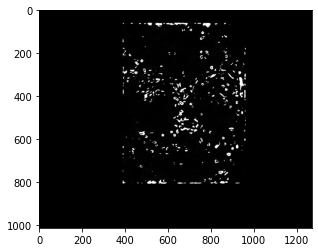

In [94]:
mp = deepcopy(ssim_map)
mp[ssim_map < .95] = 0
plt.imshow((1 - mp), cmap='gray')

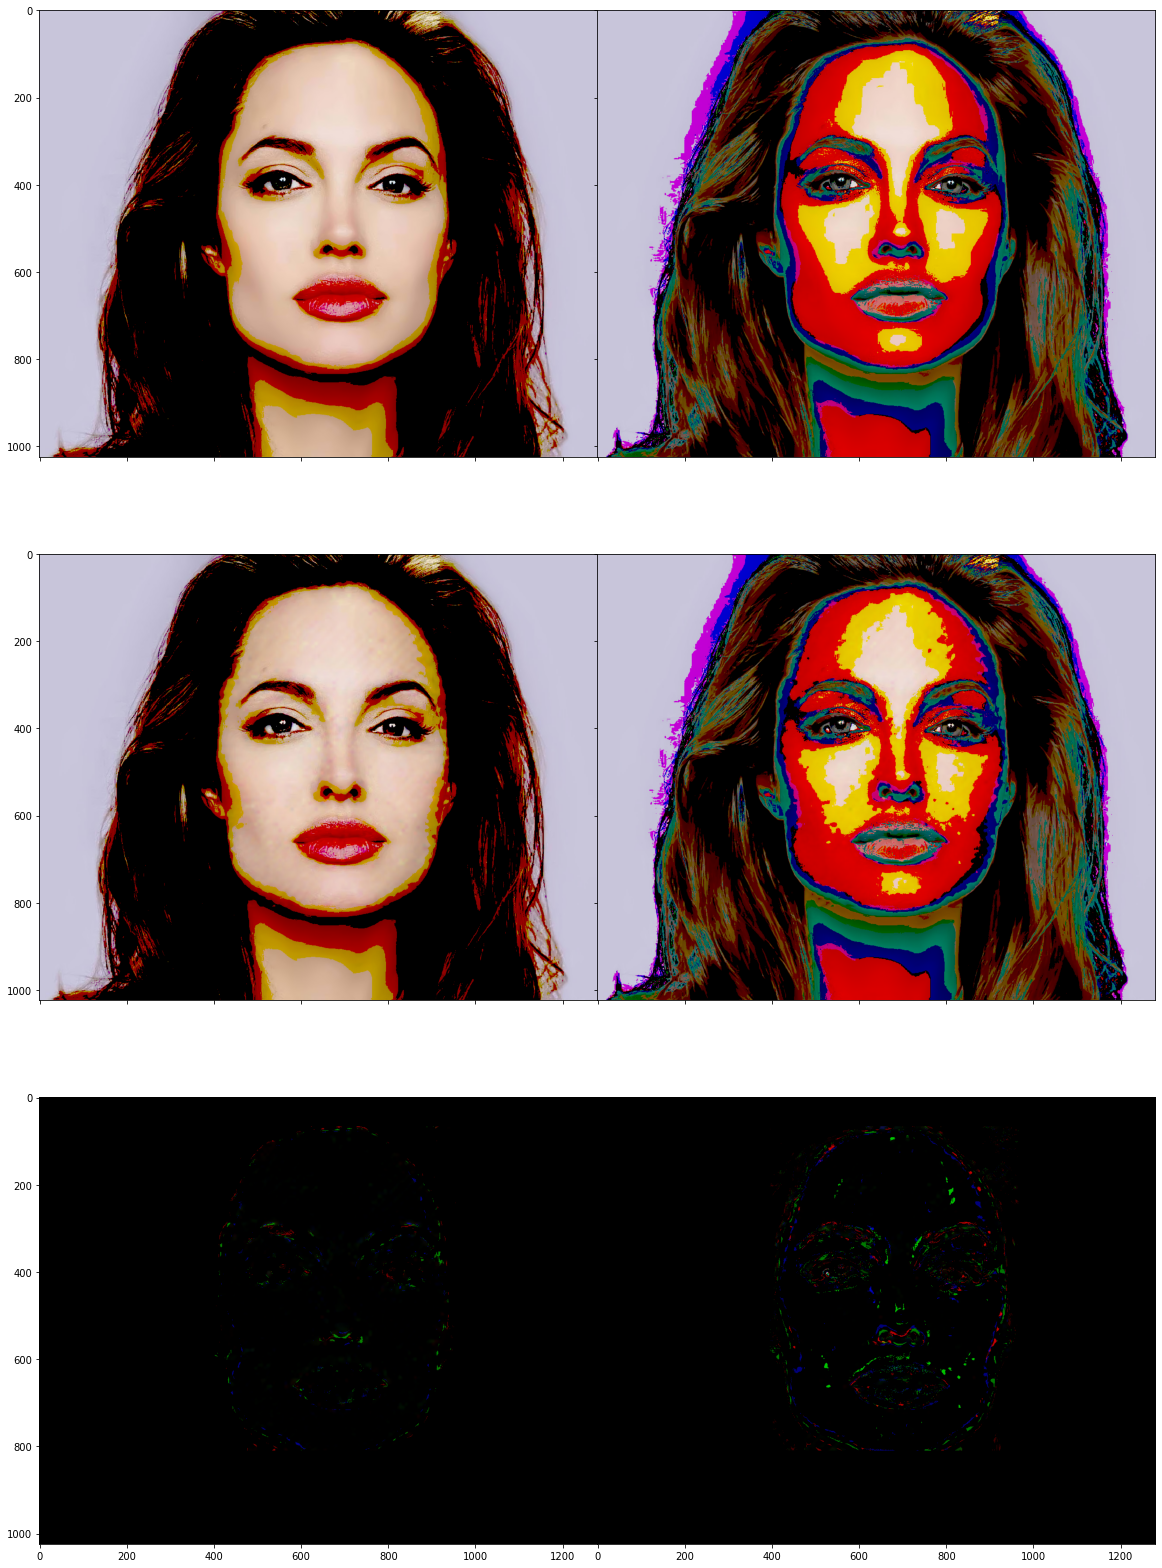

In [106]:
fig, axs = plt.subplots(3, 2, figsize=(20,30), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(6, 8):
    mask1 = img1 & (2**i)
    im1 = deepcopy(img1)
    im1[mask1 <= 0] = 0
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
    axs[0][7-i].imshow(im1)
    
    mask2 = img2 & (2**i)
    im2 = deepcopy(img2)
    im2[mask2 <= 0] = 0
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
    axs[1][7-i].imshow(im2)
    
    
    axs[2][7-i].imshow(cv2.subtract(im2, im1))


TypeError: unsupported operand type(s) for >>: 'builtin_function_or_method' and 'OutStream'. Did you mean "print(<message>, file=<output_stream>)"?

In [2]:
cap = cv2.VideoCapture('./imgs/video.mp4')
cap

<VideoCapture 0x7ffa9df906d0>

/home/triansh/Desktop/projects/venvs-py/jupy-lab/bin/python: Error while finding module specification for 'test.py' (ModuleNotFoundError: __path__ attribute not found on 'test' while trying to find 'test.py')
